 Model Evaluation and Refinement




In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
filepath = r'D:\EDA\Laptop\laptop_pricing_dataset_mod2.csv'

In [3]:
df = pd.read_csv(filepath)

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [10]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True, errors='ignore')

### Using Cross validation to improve the model




In [11]:

y_data = df['Price']
x_data = df.drop('Price',axis =1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)


In [28]:
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))



Text(0.5, 1.0, 'R^2 Using Test Data')

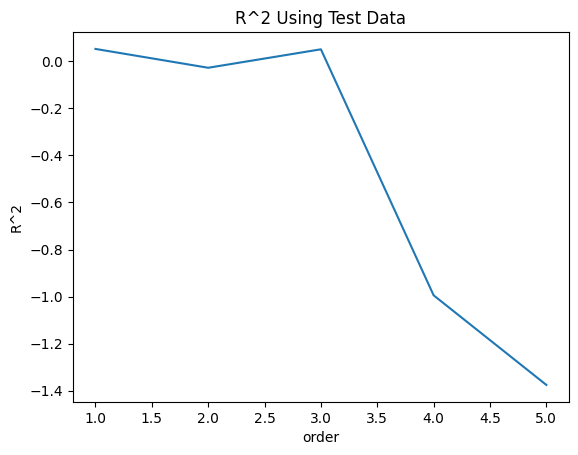

In [29]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')



```markdown
# Task 3 : Ridge Regression

Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.
```

In [31]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])


In [32]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)

for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

print("Ridge Regression R^2 scores for test data (first 5):", Rsqu_test[:5])
print("Ridge Regression R^2 scores for training data (first 5):", Rsqu_train[:5])

Ridge Regression R^2 scores for test data (first 5): [0.3736841310704857, 0.40397330077715143, 0.41550393485759307, 0.4205808661477777, 0.42287027362382634]
Ridge Regression R^2 scores for training data (first 5): [0.7035733878810604, 0.6991070764305987, 0.6957005215338414, 0.6931342410599819, 0.6911529796162619]


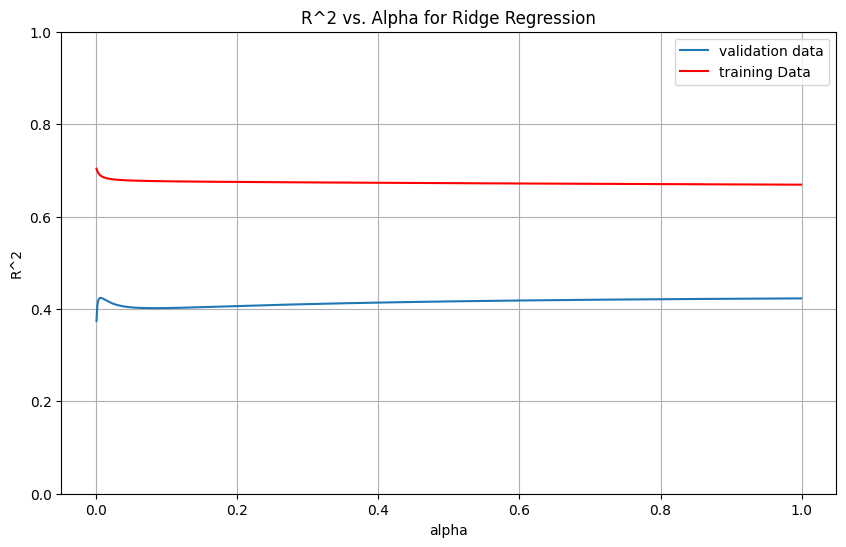

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()
plt.title('R^2 vs. Alpha for Ridge Regression')
plt.grid(True)
plt.show()

```markdown
# Task 4: Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best.
Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```


In [21]:
parameters1 = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]
print("parameters1 dictionary defined:")
print(parameters1)

parameters1 dictionary defined:
[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]


In [33]:
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)

Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)
print("GridSearchCV setup and fitted.")

GridSearchCV setup and fitted.


In [23]:
BestRR=Grid1.best_estimator_
print("R^2 score of best estimator on test data:", BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

R^2 score of best estimator on test data: 0.300990504869182


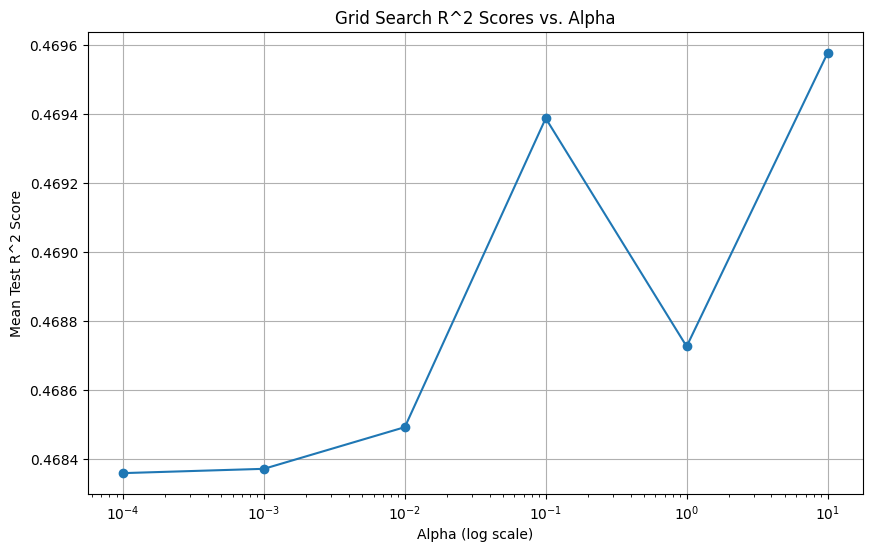

In [24]:
results = Grid1.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results['param_alpha'], results['mean_test_score'], marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Test R^2 Score')
plt.title('Grid Search R^2 Scores vs. Alpha')
plt.grid(True)
plt.show()